Script to visualize the RNA-seq, FAIRE-seq and integrated data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from natsort import natsorted
import os

In [2]:
cwd = os.getcwd() # current working directory. All scripts in this directory. Inside : RNA, FAIRE, and integrated
RNA_directory = cwd + '/RNA/' # there's also the R scripts and result of the AskoR analysis inside
FAIRE_directory = cwd + '/FAIRE/'
integrated_directory = cwd + '/integrated/'
plot_directory = cwd + '/plots/' # where you want all the plot to go

bp_overlap = number of base pair overlapping between DEG and DAR (comes from bedtools intersect parameter -wo: Reports a column after each combination of intersecting “A” and “B” features indicating the amount of overlap in bases pairs that is observed between the two features.)

"seqid" to "attributes": headers coming from the gff 

Note: there is a difference between the consensus_peaks.mLb.clN.boolean.txt output of nfcore/atacseq in mode narrow and broad: narrow has 5 additionnal columns for the summits 

In [3]:
# Prepare all headers for the file imports
header_DAR_broad = ['chr', 'start', 'end', 'interval_id', 'num_peaks', 'num_samples', 'Male1_bool', 'Male2_bool', 'Partheno1_bool', 'Partheno2_bool', 'Partheno3_bool', 'Male1_fc', 'Male2_fc', 'Partheno1_fc', 'Partheno2_fc', 'Partheno3_fc', 'Male1_qval', 'Male2_qval', 'Partheno1_qval', 'Partheno2_qval', 'Partheno3_qval', 'Male1_pval', 'Male2_pval', 'Partheno1_pval', 'Partheno2_pval', 'Partheno3_pval', 'Male1_start', 'Male2_start', 'Partheno1_start', 'Partheno2_start', 'Partheno3_start', 'Male1_end', 'Male2_end', 'Partheno1_end', 'Partheno2_end', 'Partheno3_end']
header_DAR_narrow = header_DAR_broad + ['Male1_summit', 'Male2_summit', 'Partheno1_summit', 'Partheno2_summit', 'Partheno3_summit']
header_DEG_gff = ['seqid', 'source', 'type', 'DEG_start', 'DEG_end', 'score', 'strand', 'phase', 'attributes']
header_DEG_bed = ['seqid', 'DEG_start', 'DEG_end', 'strand', 'gene']
header_DAR_broad_DEG = header_DAR_broad[:4] + ['strand', 'gene'] + header_DAR_broad[4:]
header_DAR_narrow_DEG = header_DAR_narrow[:4] + ['strand', 'gene'] + header_DAR_narrow[4:]
header_DAR_DEG_reduced = ['chr', 'start', 'end', 'interval_id', 'strand', 'gene']

In [4]:
# parameters
peak_types = ["broad", "narrow"]
min_reps = ["minreps1", "minreps2"]
groups = ['male', 'partheno', 'intergroup']
genders = ["male", "partheno"]

# RNA-seq data visualizations

In [5]:
# DEG
DEG_male_tss_bed = pd.read_csv(RNA_directory + 'DEG_male_tss.bed', sep='\t', names=header_DEG_bed)
DEG_partheno_tss_bed = pd.read_csv(RNA_directory + 'DEG_partheno_tss.bed', sep='\t', names=header_DEG_bed)
# renaming scaffold_1 to something easier to understand
DEG_male_tss_bed['seqid'] = DEG_male_tss_bed['seqid'].apply(lambda x: 'chr_X' if x == 'scaffold_1' else x)
DEG_partheno_tss_bed['seqid'] = DEG_partheno_tss_bed['seqid'].apply(lambda x: 'chr_X' if x == 'scaffold_1' else x)

# the general files are in the root of this project
all_genes = pd.read_csv('Acyrthosiphon_pisum_JIC1_v1.0.scaffolds.braker2.gff', sep='\t', names=header_DEG_gff)
all_genes = all_genes[all_genes['type'] == 'gene']
# renaming scaffold_1 to something easier to understand
all_genes['seqid'] = all_genes['seqid'].apply(lambda x: 'chr_X' if x == 'scaffold_1' else x)

In [6]:
DEG_male_tss_bed

,seqid,DEG_start,DEG_end,strand,gene
0,chr_X,182836,185836,+,g168
1,chr_X,222426,225426,-,g169
2,chr_X,223016,226016,+,g170
3,chr_X,614736,617736,-,g190
4,chr_X,614956,617956,+,g191
...,...,...,...,...,...
2862,scaffold_418,0,1501,+,g33
2863,scaffold_462,3046,6046,-,g31176
2864,scaffold_488,0,1501,+,g20198
2865,scaffold_512,1576,4576,-,g22836


In [7]:
DEG_partheno_tss_bed

,seqid,DEG_start,DEG_end,strand,gene
0,chr_X,70696,73696,+,g157
1,chr_X,345946,348946,+,g175
2,chr_X,400346,403346,+,g178
3,chr_X,440526,443526,+,g180
4,chr_X,1107061,1110061,+,g210
...,...,...,...,...,...
1804,scaffold_215,10291,13291,-,g20213
1805,scaffold_263,6686,9686,-,g22722
1806,scaffold_399,0,2976,-,g40
1807,scaffold_404,5426,8426,-,g22716


In [8]:
all_genes

,seqid,source,type,DEG_start,DEG_end,score,strand,phase,attributes
0,chr_X,AUGUSTUS,gene,1,16926,0.01,+,.,ID=g155;
23,chr_X,AUGUSTUS,gene,18307,49326,0.01,-,.,ID=g156;
57,chr_X,AUGUSTUS,gene,72196,89061,0.03,+,.,ID=g157;
81,chr_X,AUGUSTUS,gene,91566,96578,0.18,+,.,ID=g158;
109,chr_X,AUGUSTUS,gene,97656,98424,0.04,+,.,ID=g159;
...,...,...,...,...,...,...,...,...,...
892747,scaffold_554,AUGUSTUS,gene,1,3246,0.35,-,.,ID=g31219;
892772,scaffold_555,AUGUSTUS,gene,1,3240,0.15,+,.,ID=g50;
892789,scaffold_555,AUGUSTUS,gene,3314,4776,0.18,-,.,ID=g51;
892811,scaffold_556,AUGUSTUS,gene,1,5020,0.04,-,.,ID=g20150;


In [9]:
# Combining data into a single df for the merged comparison; create a "Dataset" column containing the file's origin
combined_data_RNA = pd.concat([
    DEG_male_tss_bed.assign(Dataset='DEG Male TSS'),
    DEG_partheno_tss_bed.assign(Dataset='DEG Partheno TSS')
])


## Visualizations : distribution of peaks on each scaffold depending on the dataset

### DEG male and partheno

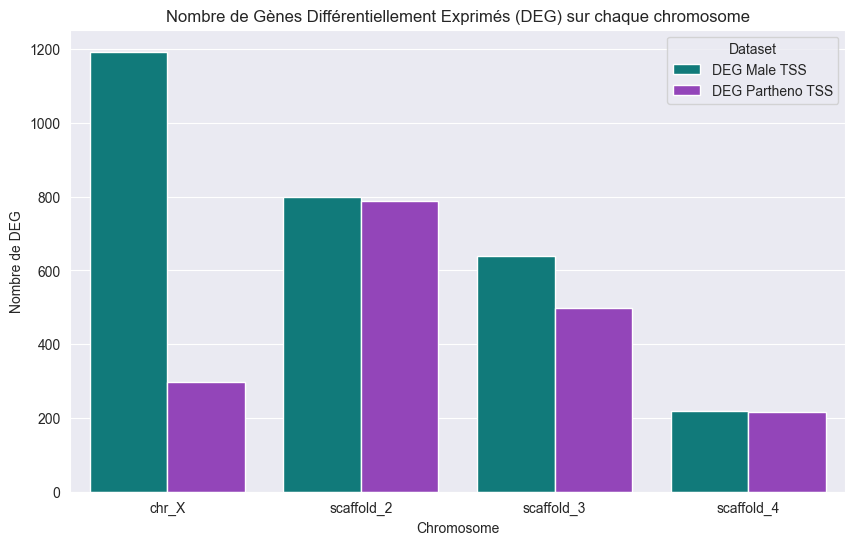

In [10]:
# To avoid a duplicate error
if combined_data_RNA.index.duplicated().any():
    combined_data_RNA.reset_index(drop=True, inplace=True)
    
palette = {
    'DEG Partheno TSS': 'darkorchid',
    'DEG Male TSS': 'darkcyan'
}

plt.figure(figsize=(10, 6))
# natsort to avoid having scaffold_10 before scaffold_2 (for example)
sns.countplot(data=combined_data_RNA, x='seqid', hue='Dataset', order=natsorted(combined_data_RNA['seqid'].unique())[:4], palette=palette)
plt.title('Nombre de Gènes Différentiellement Exprimés (DEG) sur chaque chromosome')
plt.ylabel('Nombre de DEG')
plt.xlabel('Chromosome')
plt.savefig(plot_directory + 'RNA_count_per_scaffold.png')
plt.show()
plt.close()

In [11]:
chr_counts = DEG_male_tss_bed['seqid'].value_counts()
print(chr_counts[:10])  # To double-check the values in the upper plot (all good)

seqid
chr_X           1193
scaffold_2       798
scaffold_3       640
scaffold_4       219
scaffold_300       1
scaffold_512       1
scaffold_488       1
scaffold_462       1
scaffold_418       1
scaffold_416       1
Name: count, dtype: int64


### All genes

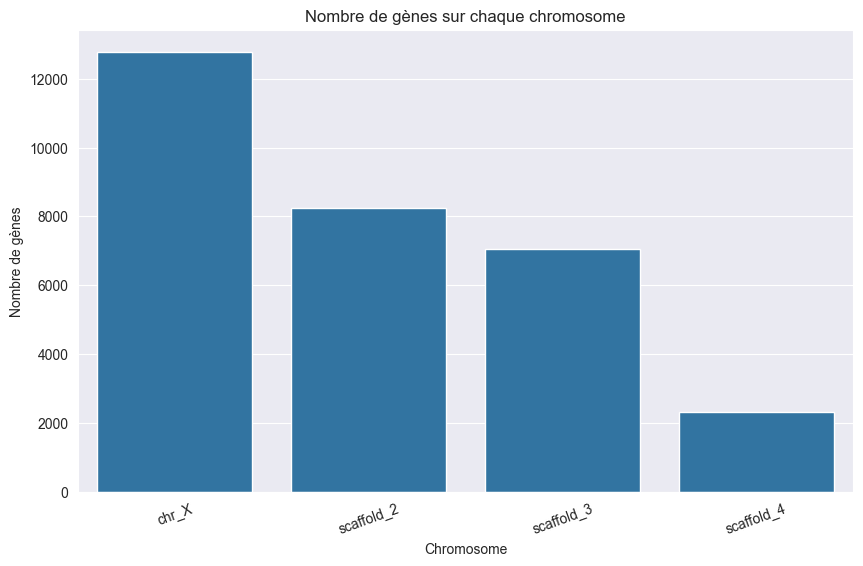

In [12]:
plt.figure(figsize=(10, 6))
sns.countplot(data=all_genes, x='seqid', order=all_genes['seqid'].unique()[:4])
plt.title('Nombre de gènes sur chaque chromosome')
plt.ylabel('Nombre de gènes')
plt.xlabel('Chromosome')
plt.xticks(rotation=20)
plt.savefig(plot_directory + 'all_genes_count_per_scaffold.png')
plt.show()
plt.close()

## Coverage per chromosome
salmon.merged.gene_counts.tsv X gff to retrieve the chomosome information (but keeping only the expressed genes with X MaleVsPartheno.txt)

In [13]:
gene_tpm = pd.read_csv(RNA_directory + 'AskoR/input/salmon.merged.gene_tpm.tsv', sep='\t')
expressed = pd.read_csv(RNA_directory + 'AskoR/MaleVsPartheno/DEanalysis/DEtables/MalevsPartheno.txt', sep='\t')

# Adding a column gene to the gff to keep the expressed genes easier
all_genes['gene'] = all_genes['attributes'].str.extract(r'ID=(.*);')

expressed_genes = all_genes[(all_genes['gene'].isin(expressed.gene))]

gene_tpm_chr = pd.merge(gene_tpm, expressed_genes[['gene','seqid']], left_on='gene_id',
                        right_on='gene',
                        how='inner')

gene_tpm_chr['Male'] = gene_tpm_chr['Male1'] + gene_tpm_chr['Male2']
gene_tpm_chr['Partheno'] = gene_tpm_chr['Partheno1'] + gene_tpm_chr['Partheno2']

# We keep just the necessary columns
gene_tpm_chr = gene_tpm_chr[['seqid', 'Male', 'Partheno']]

gene_tpm_chr

,seqid,Male,Partheno
0,chr_X,13.206397,5.311231
1,chr_X,11.628537,39.347677
2,chr_X,26.108813,24.985899
3,chr_X,9.271824,9.357801
4,chr_X,103.539489,82.384892
...,...,...,...
14103,chr_X,81.838562,88.808368
14104,chr_X,45.476778,15.581948
14105,chr_X,5.258155,24.261502
14106,chr_X,712.135593,413.329743


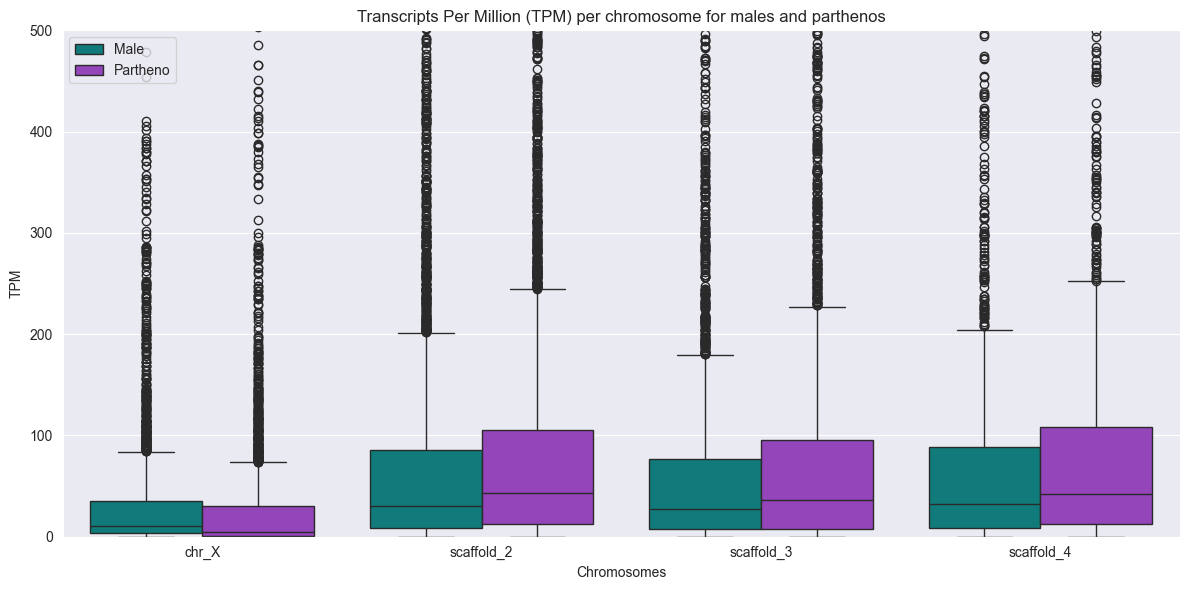

In [14]:
plot_data_melted = gene_tpm_chr.melt(id_vars='seqid', var_name='group', value_name='summed_counts')

plt.figure(figsize=(12, 6))
# natsort to avoid having scaffolds we don't want (like scaffold_100 etc)
ax = sns.boxplot(x='seqid', y='summed_counts', hue='group', data=plot_data_melted, order=natsorted(gene_tpm_chr['seqid'].unique())[:4], palette={'Male': 'darkcyan', 'Partheno': 'darkorchid'})
ax.set_title('Transcripts Per Million (TPM) per chromosome for males and parthenos')  # summed
ax.set_xlabel('Chromosomes')
ax.set_ylabel('TPM')
ax.legend(loc='upper left')
plt.ylim(0,500)
plt.tight_layout()
plt.savefig(plot_directory + 'coverage_per_scaffold.png')
plt.show()
plt.close()

In [15]:
plot_data_melted

,seqid,group,summed_counts
0,chr_X,Male,13.206397
1,chr_X,Male,11.628537
2,chr_X,Male,26.108813
3,chr_X,Male,9.271824
4,chr_X,Male,103.539489
...,...,...,...
28211,chr_X,Partheno,88.808368
28212,chr_X,Partheno,15.581948
28213,chr_X,Partheno,24.261502
28214,chr_X,Partheno,413.329743


# FAIRE-seq data visualizations 


In [16]:
min_rep = '1'

# DAR broad
DAR_broad_male = pd.read_csv(FAIRE_directory + 'DAR_broad_male_minreps' + min_rep + '.bed', sep='\t', names=header_DAR_broad)
DAR_broad_partheno = pd.read_csv(FAIRE_directory + 'DAR_broad_partheno_minreps' + min_rep + '.bed', sep='\t', names=header_DAR_broad)
intergroup_broad = pd.read_csv(FAIRE_directory + 'DAR_broad_intergroup_minreps' + min_rep + '.bed', sep='\t', names=header_DAR_broad)


# DAR narrow
DAR_narrow_male = pd.read_csv(FAIRE_directory + 'DAR_narrow_male_minreps' + min_rep + '.bed', sep='\t', names=header_DAR_narrow)
DAR_narrow_partheno = pd.read_csv(FAIRE_directory + 'DAR_narrow_partheno_minreps' + min_rep + '.bed', sep='\t', names=header_DAR_narrow)
intergroup_narrow = pd.read_csv(FAIRE_directory + 'DAR_narrow_intergroup_minreps' + min_rep + '.bed', sep='\t', names=header_DAR_narrow)

In [17]:
DAR_narrow_male

,chr,start,end,interval_id,num_peaks,num_samples,Male1_bool,Male2_bool,Partheno1_bool,Partheno2_bool,...,Male1_end,Male2_end,Partheno1_end,Partheno2_end,Partheno3_end,Male1_summit,Male2_summit,Partheno1_summit,Partheno2_summit,Partheno3_summit
0,scaffold_1,32814,33059,Interval_1,1,1,True,False,False,False,...,33059,NaN,NaN,NaN,NaN,59,NaN,NaN,NaN,NaN
1,scaffold_1,43524,43766,Interval_4,1,1,False,True,False,False,...,NaN,43766,NaN,NaN,NaN,NaN,142,NaN,NaN,NaN
2,scaffold_1,205473,205653,Interval_10,1,1,True,False,False,False,...,205653,NaN,NaN,NaN,NaN,150,NaN,NaN,NaN,NaN
3,scaffold_1,615790,616028,Interval_19,1,1,False,True,False,False,...,NaN,616028,NaN,NaN,NaN,NaN,121,NaN,NaN,NaN
4,scaffold_1,856201,856423,Interval_30,1,1,True,False,False,False,...,856423,NaN,NaN,NaN,NaN,9,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15110,scaffold_520,89,321,Interval_39067,1,1,False,True,False,False,...,NaN,321,NaN,NaN,NaN,NaN,142,NaN,NaN,NaN
15111,scaffold_553,3418,3754,Interval_39073,1,1,False,True,False,False,...,NaN,3754,NaN,NaN,NaN,NaN,305,NaN,NaN,NaN
15112,scaffold_81,13541,13965,Interval_39094,2,2,True,True,False,False,...,13892,13965,NaN,NaN,NaN,257,107,NaN,NaN,NaN
15113,scaffold_88,18958,19912,Interval_39097,2,2,True,True,False,False,...,19453,19912,NaN,NaN,NaN,96,262,NaN,NaN,NaN


In [18]:
intergroup_broad

,chr,start,end,interval_id,num_peaks,num_samples,Male1_bool,Male2_bool,Partheno1_bool,Partheno2_bool,...,Male1_start,Male2_start,Partheno1_start,Partheno2_start,Partheno3_start,Male1_end,Male2_end,Partheno1_end,Partheno2_end,Partheno3_end
0,scaffold_1,32808,35384,Interval_1,4,4,True,True,True,False,...,32808,32889,33104,NaN,34024,35302,35384,35347,NaN,34270
1,scaffold_1,47327,49271,Interval_3,6,4,True,True,True,False,...,47334;48673,47331,47327;48733,NaN,47795,47922;49130,49271,47925;49251,NaN,49228
2,scaffold_1,92727,93096,Interval_4,2,2,False,True,True,False,...,NaN,92806,92727,NaN,NaN,NaN,93096,93022,NaN,NaN
3,scaffold_1,126129,126676,Interval_5,3,3,True,True,False,False,...,126130,126235,NaN,NaN,126129,126635,126676,NaN,NaN,126609
4,scaffold_1,280480,281073,Interval_11,4,4,False,True,True,True,...,NaN,280493,280480,280524,280507,NaN,281073,280711,280932,280687
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21238,scaffold_81,6562,7497,Interval_44241,3,3,True,True,True,False,...,6737,6562,6654,NaN,NaN,7221,7497,7218,NaN,NaN
21239,scaffold_81,13541,14019,Interval_44242,3,3,True,True,True,False,...,13541,13740,13797,NaN,NaN,13892,14019,13974,NaN,NaN
21240,scaffold_9,86879,87165,Interval_44248,2,2,False,True,True,False,...,NaN,86879,86921,NaN,NaN,NaN,87128,87165,NaN,NaN
21241,scaffold_99,12669,14125,Interval_44250,3,3,True,True,True,False,...,12741,12669,12899,NaN,NaN,13432,13677,14125,NaN,NaN


In [19]:
# List of DataFrame and their corresponding labels
dfs = [
    (DAR_broad_male, 'DAR_broad_male'),
    (DAR_broad_partheno, 'DAR_broad_partheno'),
    (intergroup_broad, 'intergroup_broad'),
    (DAR_narrow_male, 'DAR_narrow_male'),
    (DAR_narrow_partheno, 'DAR_narrow_partheno'),
    (intergroup_narrow, 'intergroup_narrow')
]

# Calculate peak size for all dfs and adding a column to know from where it comes
for df, label in dfs:
    df['peak_size'] = df['end'] - df['start']
    df['peak_type'] = 'narrow' if 'narrow' in label else 'broad'
    
# Combining data into a single df for the merged comparison; create a "Dataset" column containing the file's origin
combined_data_FAIRE = pd.concat([
    DAR_broad_male.assign(Dataset='Broad Male'),
    DAR_broad_partheno.assign(Dataset='Broad Partheno'),
    intergroup_broad.assign(Dataset='Broad intergroup'),
    DAR_narrow_male.assign(Dataset='Narrow Male'),
    DAR_narrow_partheno.assign(Dataset='Narrow Partheno'),
    intergroup_narrow.assign(Dataset='Narrow intergroup')
])

In [20]:
combined_data_FAIRE

,chr,start,end,interval_id,num_peaks,num_samples,Male1_bool,Male2_bool,Partheno1_bool,Partheno2_bool,...,Partheno2_end,Partheno3_end,peak_size,peak_type,Dataset,Male1_summit,Male2_summit,Partheno1_summit,Partheno2_summit,Partheno3_summit
0,scaffold_1,43510,43769,Interval_2,2,2,True,True,False,False,...,NaN,NaN,259,broad,Broad Male,NaN,NaN,NaN,NaN,NaN
1,scaffold_1,205473,205653,Interval_8,1,1,True,False,False,False,...,NaN,NaN,180,broad,Broad Male,NaN,NaN,NaN,NaN,NaN
2,scaffold_1,666042,666280,Interval_25,1,1,False,True,False,False,...,NaN,NaN,238,broad,Broad Male,NaN,NaN,NaN,NaN,NaN
3,scaffold_1,856129,856490,Interval_37,2,2,True,True,False,False,...,NaN,NaN,361,broad,Broad Male,NaN,NaN,NaN,NaN,NaN
4,scaffold_1,1054779,1055762,Interval_46,1,1,False,True,False,False,...,NaN,NaN,983,broad,Broad Male,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16170,scaffold_81,4978,5317,Interval_39092,4,4,False,True,True,True,...,5290,5220,339,narrow,Narrow intergroup,NaN,89,77,129,78
16171,scaffold_81,6569,7495,Interval_39093,3,3,True,True,True,False,...,NaN,NaN,926,narrow,Narrow intergroup,278,211,94,NaN,NaN
16172,scaffold_9,86891,87165,Interval_39101,2,2,False,True,True,False,...,NaN,NaN,274,narrow,Narrow intergroup,NaN,81,74,NaN,NaN
16173,scaffold_99,12671,13133,Interval_39103,3,3,True,True,True,False,...,NaN,NaN,462,narrow,Narrow intergroup,160,215,108,NaN,NaN


## Visualizations : distribution of peak sizes

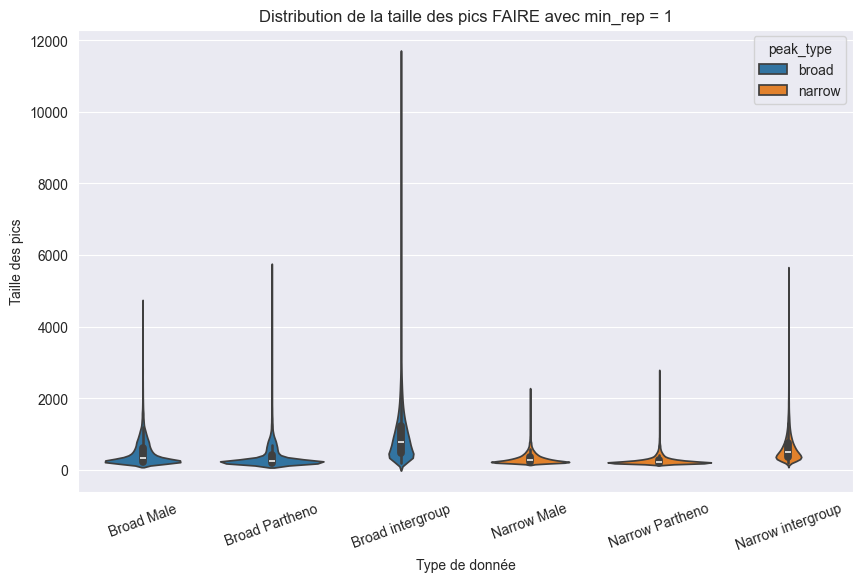

In [21]:
plt.figure(figsize=(10, 6))
sns.violinplot(data=combined_data_FAIRE, x='Dataset', y='peak_size', hue='peak_type')
plt.title('Distribution de la taille des pics FAIRE avec min_rep = ' + min_rep)
plt.ylabel('Taille des pics')
plt.xlabel('Type de donnée')
plt.xticks(rotation=20)
plt.savefig(f'{plot_directory}FAIRE_peak_size_comparison_minreps{min_rep}.png')
plt.show()
plt.close()

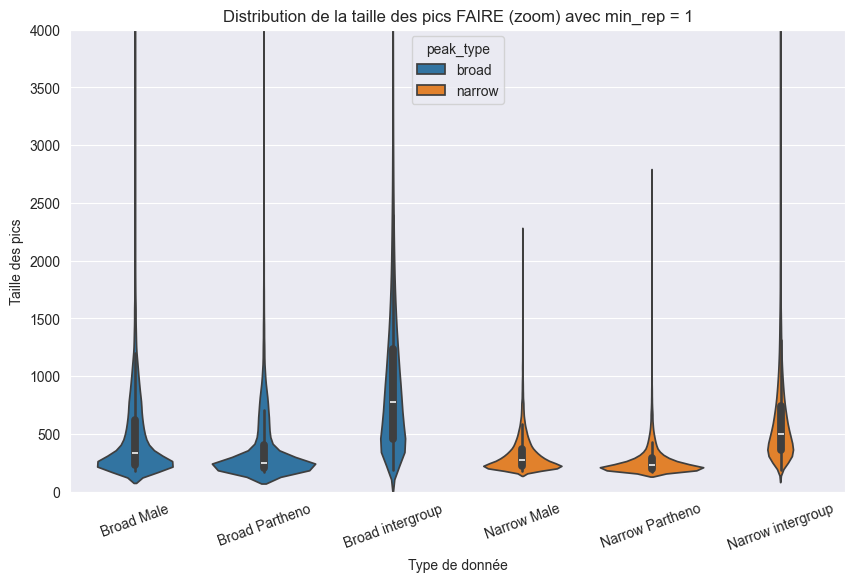

In [22]:
# Same, but zoomed with plt.ylim
plt.figure(figsize=(10, 6))
sns.violinplot(data=combined_data_FAIRE, x='Dataset', y='peak_size', hue='peak_type')
plt.title('Distribution de la taille des pics FAIRE (zoom) avec min_rep = ' + min_rep)
plt.ylabel('Taille des pics')
plt.xlabel('Type de donnée')
plt.xticks(rotation=20)
plt.ylim(0,4000)
plt.savefig(f'{plot_directory}FAIRE_peak_size_comparison_zoom_minreps{min_rep}.png')
plt.show()
plt.close()

In [23]:
# To know the exact number of outliers
from matplotlib.cbook import boxplot_stats  
len(boxplot_stats(intergroup_narrow['peak_size']).pop(0)['fliers'])

913

## Visualization: number of peaks
### Fetch data (total count per group)

In [24]:
peak_data = []
# Fetching data
for peak_type in peak_types:
    for min_rep in min_reps:
        for group in groups:
            DAR_path = f'{FAIRE_directory}DAR_{peak_type}_{group}_{min_rep}.bed'
            DAR_peak_count = pd.read_csv(DAR_path, sep='\t', names=header_DAR_broad).shape[0]
            peak_data.append((group, peak_type, min_rep, DAR_peak_count))

# Convert the peak data to a df
peak_data_df = pd.DataFrame(peak_data, columns=['group', 'peak_type', 'min_rep', 'DAR_peak_count'])

# Need to pivot to get a correct structure for plotting
peak_data_pivot = peak_data_df.pivot_table(index='group', columns=['peak_type', 'min_rep'], values='DAR_peak_count', fill_value=0)
peak_data_pivot = peak_data_pivot.reindex(groups)  # so that intergroup arrives last and not first
peak_data_pivot.columns = ['_'.join(col) for col in peak_data_pivot.columns]  # flattening it to make it easier to plot

peak_data_pivot

,broad_minreps1,broad_minreps2,narrow_minreps1,narrow_minreps2
group,,,,
male,14507.0,1875.0,15115.0,1689.0
partheno,8501.0,1955.0,7814.0,1725.0
intergroup,21243.0,8788.0,16175.0,4886.0


In [25]:
peak_data_df

,group,peak_type,min_rep,DAR_peak_count
0,male,broad,minreps1,14507
1,partheno,broad,minreps1,8501
2,intergroup,broad,minreps1,21243
3,male,broad,minreps2,1875
4,partheno,broad,minreps2,1955
5,intergroup,broad,minreps2,8788
6,male,narrow,minreps1,15115
7,partheno,narrow,minreps1,7814
8,intergroup,narrow,minreps1,16175
9,male,narrow,minreps2,1689


### Plotting : minreps2 stacked on minreps1

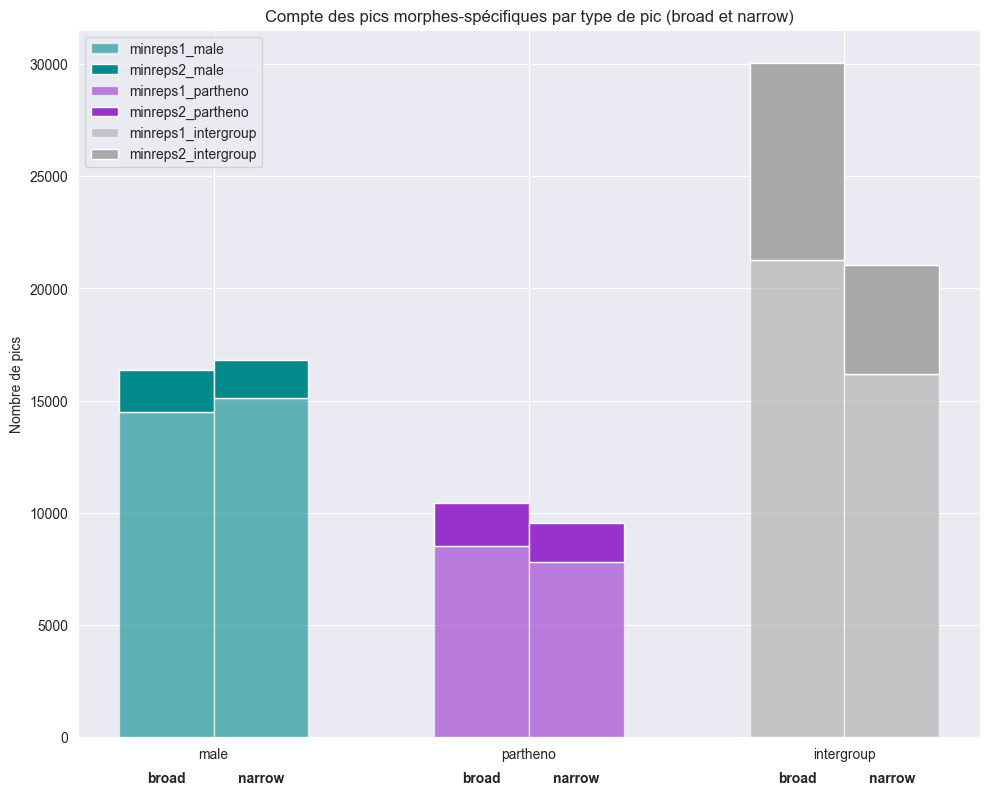

In [26]:
fig, ax = plt.subplots(figsize=(10, 8))
bar_width = 0.3
index = pd.Index(range(len(peak_data_pivot)))
group_colors = {'male': 'darkcyan', 'partheno': 'darkorchid', 'intergroup': 'darkgrey'}

for i, group in enumerate(peak_data_pivot.index):
    ax.bar(index[i] - bar_width/2, peak_data_pivot.loc[group, 'broad_minreps1'], bar_width, label=f'minreps1_{group}', color=group_colors[group], alpha=0.6)
    ax.bar(index[i] - bar_width/2, peak_data_pivot.loc[group, 'broad_minreps2'], bar_width, bottom=peak_data_pivot.loc[group, 'broad_minreps1'], color=group_colors[group], label=f'minreps2_{group}')
    ax.bar(index[i] + bar_width/2, peak_data_pivot.loc[group, 'narrow_minreps1'], bar_width, color=group_colors[group], alpha=0.6)
    ax.bar(index[i] + bar_width/2, peak_data_pivot.loc[group, 'narrow_minreps2'], bar_width, bottom=peak_data_pivot.loc[group, 'narrow_minreps1'], color=group_colors[group])

ax.set_ylabel('Nombre de pics')
ax.set_title('Compte des pics morphes-spécifiques par type de pic (broad et narrow)')
ax.set_xticks(index)
ax.set_xticklabels(peak_data_pivot.index, verticalalignment='top')
ax.legend(loc='upper left')

# Add secondary x-axis labels for broad and narrow
for i in range(len(peak_data_pivot.index)):
    ax.text(i - bar_width/2, -2000, 'broad', ha='center', fontweight='bold')
    ax.text(i + bar_width/2, -2000, 'narrow', ha='center', fontweight='bold')

plt.tight_layout()
plt.savefig(plot_directory + 'FAIRE_peak_counts.png')
plt.show()
plt.close()

## Visualizations : distribution of peaks DAR on each scaffold depending on the dataset
### Fetch data (count per scaffold)

In [27]:
DAR_peak_data = []
for peak_type in peak_types:
    for min_rep in min_reps:
        for gender in genders:
            DAR_path = f'{FAIRE_directory}DAR_{peak_type}_{gender}_{min_rep}.bed'
            header = header_DAR_broad if peak_type == 'broad' else header_DAR_narrow
            DAR_peak_count = pd.read_csv(DAR_path, sep='\t', names=header)
            counts = [DAR_peak_count[DAR_peak_count.chr == f'scaffold_{i}'].shape[0] for i in range(1, 5)]  # we just want the 4 first scaffolds
            DAR_peak_data.append((gender, peak_type, min_rep, *counts))

# Convert to df
columns = ['gender', 'peak_type', 'min_reps', 'scaffold_1', 'scaffold_2', 'scaffold_3', 'scaffold_4']
df = pd.DataFrame(DAR_peak_data, columns=columns)

# Reshape for plotting
df_melted = df.melt(id_vars=['gender', 'peak_type', 'min_reps'], var_name='scaffold', value_name='count')
df_melted['scaffold'] = df_melted['scaffold'].replace({'scaffold_1': 'chr_X'})
# Combine 'gender' and 'peak_type' into a single 'Dataset' column for easier plotting
df_melted['Dataset'] = df_melted['peak_type'].str.title() + ' ' + df_melted['gender'].str.title()
# Pivot the data for stacking
df_pivot = df_melted.pivot_table(index=['scaffold', 'Dataset'], columns='min_reps', values='count').reset_index()
df

,gender,peak_type,min_reps,scaffold_1,scaffold_2,scaffold_3,scaffold_4
0,male,broad,minreps1,1808,6335,4627,1687
1,partheno,broad,minreps1,4315,2037,1555,492
2,male,broad,minreps2,127,843,673,228
3,partheno,broad,minreps2,1290,328,241,66
4,male,narrow,minreps1,1618,6736,4842,1867
5,partheno,narrow,minreps1,3776,2012,1473,466
6,male,narrow,minreps2,113,757,593,219
7,partheno,narrow,minreps2,994,365,274,71


### Plotting : minreps2 stacked on minreps1

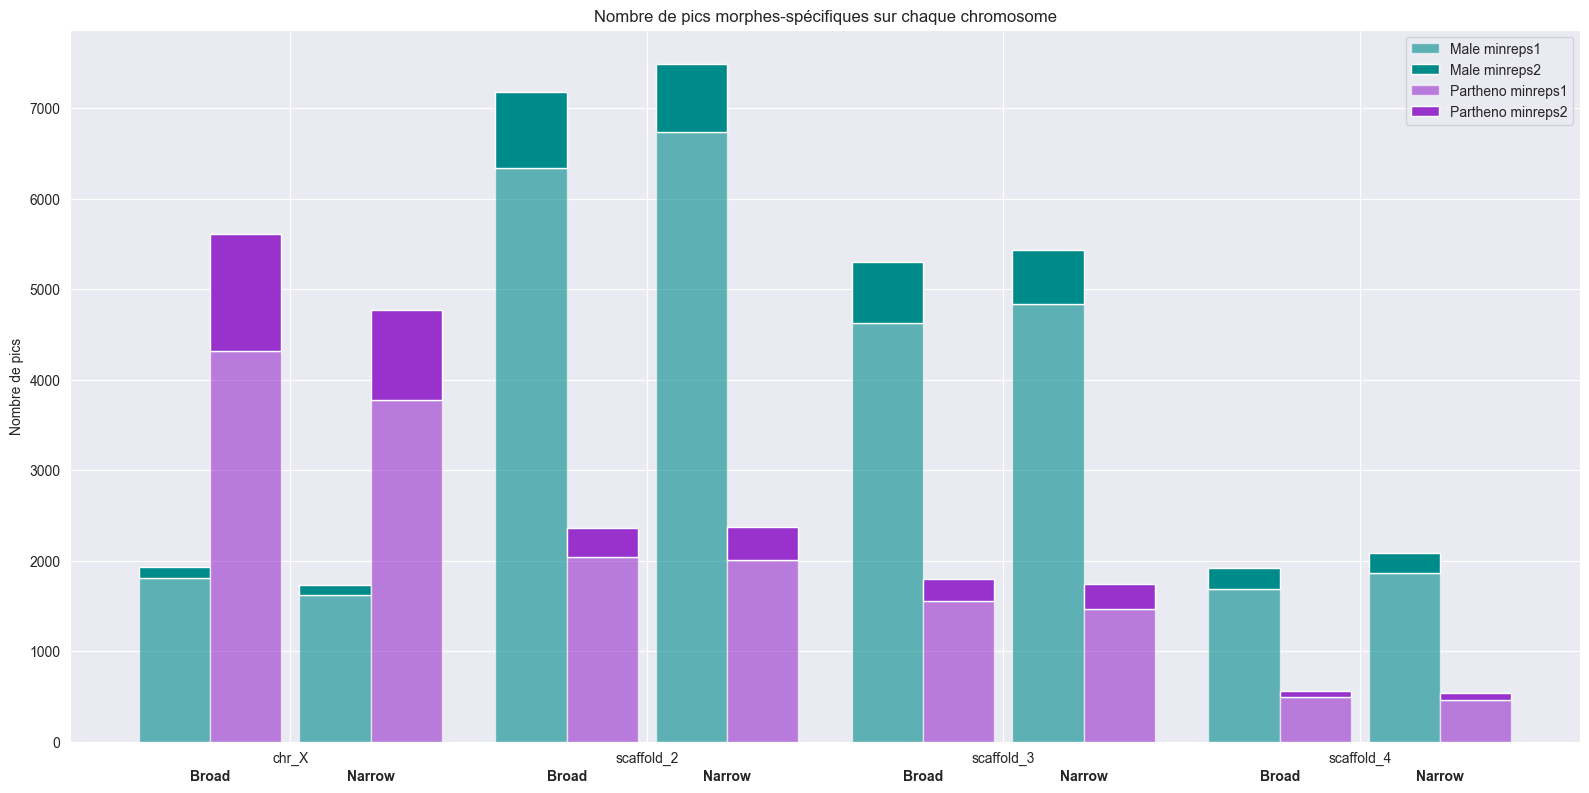

In [28]:
fig, ax = plt.subplots(figsize=(16, 8))
scaffolds = df_pivot['scaffold'].unique()
datasets = df_pivot['Dataset'].unique()
bar_width = 0.2
group_spacing = 0.05
scaffold_spacing = 0.15

colors = {
    'Broad Male': 'darkcyan',
    'Broad Partheno': 'darkorchid',
    'Narrow Male': 'darkcyan',
    'Narrow Partheno': 'darkorchid',
}

# Calculate bar positions
bar_positions = []
for i in range(len(scaffolds)):
    base_position = i * (len(datasets) * bar_width + group_spacing + scaffold_spacing)
    for j in range(len(datasets)):
        bar_positions.append(base_position + j * bar_width + (j // 2) * group_spacing)
bar_positions = np.array(bar_positions)

# Plot bars
for i, dataset in enumerate(datasets):
    data = df_pivot[df_pivot['Dataset'] == dataset]
    bar_minreps1 = data['minreps1'].fillna(0).values
    bar_minreps2 = data['minreps2'].fillna(0).values
    positions = bar_positions[i::len(datasets)]
    ax.bar(positions, bar_minreps1, bar_width, color=colors[dataset], alpha=0.6, label=f'{dataset.split(" ")[1]} minreps1' if i < 2 else "")
    ax.bar(positions, bar_minreps2, bar_width, bottom=bar_minreps1, color=colors[dataset], label=f'{dataset.split(" ")[1]} minreps2' if i < 2 else "")

scaffold_positions = bar_positions.reshape(len(scaffolds), len(datasets))
xtick_positions = scaffold_positions.mean(axis=1)
ax.set_xticks(xtick_positions)
ax.set_xticklabels(scaffolds)

# Adding sublabels for broad and narrow
for i, scaffold in enumerate(scaffolds):
    broad_position = xtick_positions[i] - bar_width - group_spacing / 2
    narrow_position = xtick_positions[i] + bar_width + group_spacing / 2
    ax.text(broad_position, -300, 'Broad', ha='center', va='top', fontsize=10, fontweight='bold')
    ax.text(narrow_position, -300, 'Narrow', ha='center', va='top', fontsize=10, fontweight='bold')

ax.set_ylabel('Nombre de pics')
ax.set_title('Nombre de pics morphes-spécifiques sur chaque chromosome')
ax.legend(loc='upper right')
plt.tight_layout()
plt.savefig(plot_directory + 'FAIRE_peak_counts_per_scaffold.png')
plt.show()
plt.close()

## Visualizations : distribution of FAIRE-seq reads on each scaffold depending on the dataset (with consensus_peaks.mLb.clN.featureCounts.txt)

In [29]:
peak_type = 'broad'
consensus_peaks_path = FAIRE_directory + peak_type + '/bwa/merged_library/macs2/' + peak_type + '_peak/consensus/consensus_peaks.mLb.clN.featureCounts.txt'
consensus_peaks = pd.read_csv(consensus_peaks_path, sep='\t', comment='#')

consensus_peaks['Male'] = consensus_peaks['Male_REP1.mLb.clN.sorted.bam'] + consensus_peaks['Male_REP2.mLb.clN.sorted.bam']
consensus_peaks['Partheno'] = consensus_peaks['Partheno_REP1.mLb.clN.sorted.bam'] + consensus_peaks['Partheno_REP2.mLb.clN.sorted.bam'] + consensus_peaks['Partheno_REP3.mLb.clN.sorted.bam']

# We keep just the necessary columns
consensus_peaks = consensus_peaks[['Chr', 'Male', 'Partheno']]
# renaming scaffold_1 to something easier to understand
consensus_peaks['Chr'] = consensus_peaks['Chr'].apply(lambda x: 'chr_X' if x == 'scaffold_1' else x)

consensus_peaks

,Chr,Male,Partheno
0,chr_X,225,220
1,chr_X,49,24
2,chr_X,193,147
3,chr_X,29,31
4,chr_X,28,30
...,...,...,...
44246,scaffold_89,10,26
44247,scaffold_9,33,22
44248,scaffold_9,60,22
44249,scaffold_99,88,86


To really make sure there are more reads on the chr_X for the parthenos than for the males (should be the opposite)

In [30]:
male_reads_count_chrX = consensus_peaks.loc[consensus_peaks['Chr'] == 'chr_X', 'Male'].sum()
partheno_reads_count_chrX = consensus_peaks.loc[consensus_peaks['Chr'] == 'chr_X', 'Partheno'].sum()
print(male_reads_count_chrX)
print(partheno_reads_count_chrX)

333928
485118


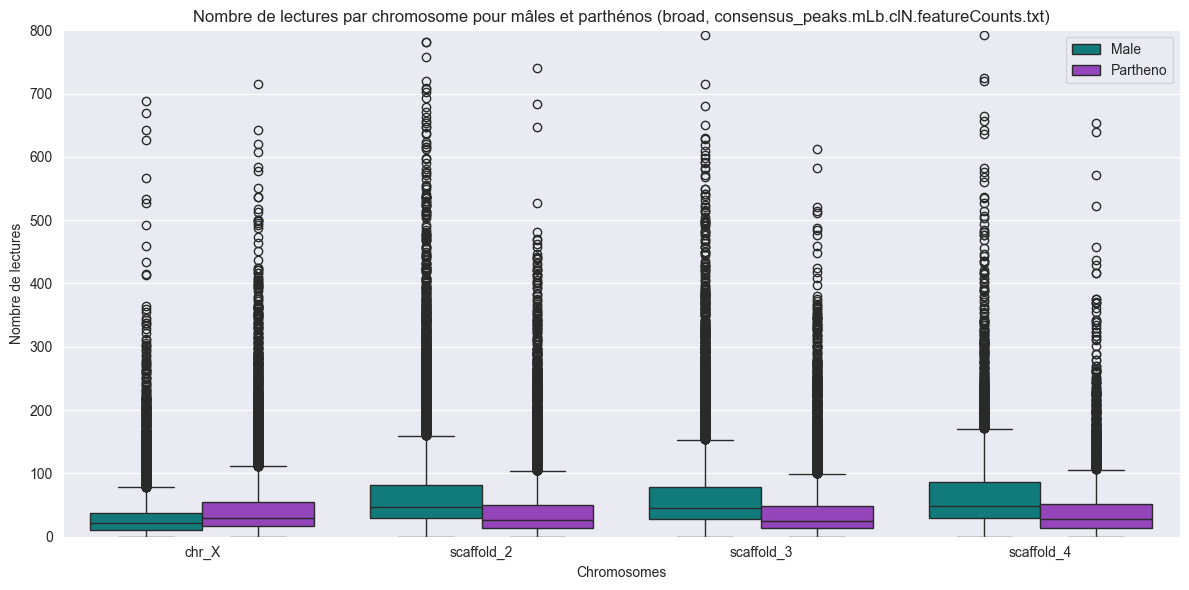

In [31]:
plot_data_melted = consensus_peaks.melt(id_vars='Chr', var_name='group', value_name='summed_counts')

plt.figure(figsize=(12, 6))
# natsort to avoid having scaffolds we don't want (like scaffold_100 etc)
ax = sns.boxplot(x='Chr', y='summed_counts', hue='group', data=plot_data_melted, order=natsorted(consensus_peaks['Chr'].unique())[:4], palette={'Male': 'darkcyan', 'Partheno': 'darkorchid'})
ax.set_title('Nombre de lectures par chromosome pour mâles et parthénos (' + peak_type + ', consensus_peaks.mLb.clN.featureCounts.txt)')
ax.set_xlabel('Chromosomes')
ax.set_ylabel('Nombre de lectures')
plt.ylim(0,800)
ax.legend(loc='upper right')
plt.tight_layout()
plt.savefig(f'{plot_directory}read_counts_per_scaffold_featureCounts_{peak_type}.png')
plt.show()
plt.close()

# Integrated data visualizations
## Visualizations : distribution of DEG + DAR peaks on each scaffold depending on the dataset
### Fetch data (count per scaffold)

In [32]:
DAR_DEG_peak_data = []
for peak_type in peak_types:
    for min_rep in min_reps:
        for gender in genders:
            DAR_DEG_path = f'{integrated_directory}DAR_{peak_type}_DEG_{gender}_{min_rep}_overlap0.9_reduced.bed'
            DAR_DEG_peak_count = pd.read_csv(DAR_DEG_path, sep='\t', names=header_DAR_DEG_reduced)
            counts = [DAR_DEG_peak_count[DAR_DEG_peak_count.chr == f'scaffold_{i}'].shape[0] for i in range(1, 5)]
            DAR_DEG_peak_data.append((gender, peak_type, min_rep, *counts))

columns = ['gender', 'peak_type', 'min_reps', 'chr_X', 'scaffold_2', 'scaffold_3', 'scaffold_4']
df = pd.DataFrame(DAR_DEG_peak_data, columns=columns)
# Reshape to have one row per scaffold per combination of other factors
df_melted = df.melt(id_vars=['gender', 'peak_type', 'min_reps'], var_name='scaffold', value_name='count')
# Combine 'gender' and 'peak_type' into a single 'Dataset' column for easier plotting
df_melted['Dataset'] = df_melted['peak_type'].str.title() + ' ' + df_melted['gender'].str.title()
df_pivot = df_melted.pivot_table(index=['scaffold', 'Dataset'], columns='min_reps', values='count').reset_index()  # for stacking minreps

df

,gender,peak_type,min_reps,chr_X,scaffold_2,scaffold_3,scaffold_4
0,male,broad,minreps1,81,105,118,25
1,partheno,broad,minreps1,31,34,15,13
2,male,broad,minreps2,4,16,28,5
3,partheno,broad,minreps2,11,10,1,1
4,male,narrow,minreps1,96,118,143,38
5,partheno,narrow,minreps1,37,45,20,10
6,male,narrow,minreps2,5,15,21,5
7,partheno,narrow,minreps2,10,13,4,1


### Plot minreps1 + minreps2 stacked

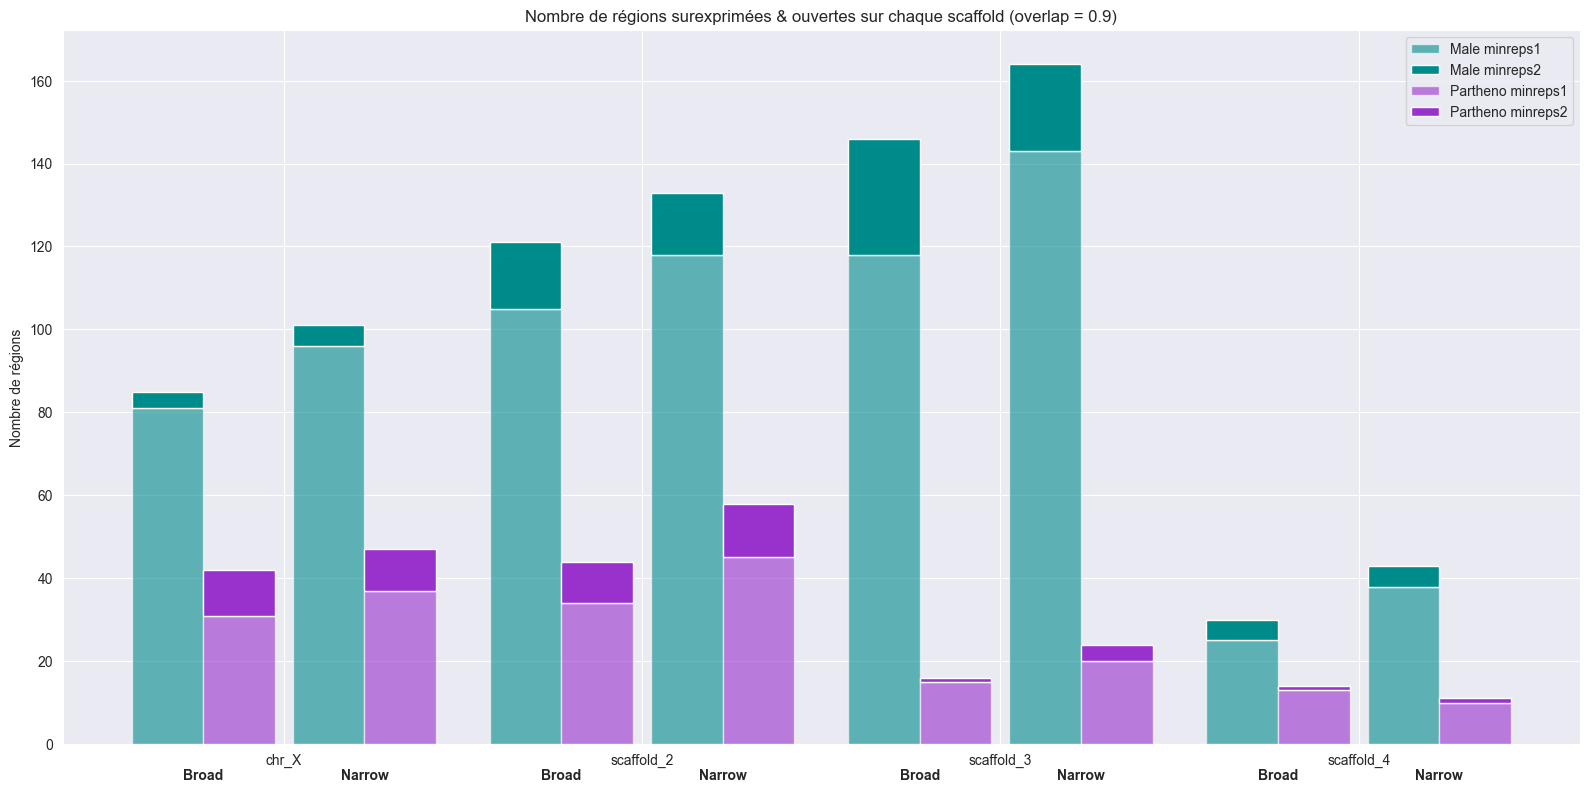

In [33]:
fig, ax = plt.subplots(figsize=(16, 8))
scaffolds = df_pivot['scaffold'].unique()
datasets = df_pivot['Dataset'].unique()
bar_width = 0.2
group_spacing = 0.05
scaffold_spacing = 0.15

bar_positions = []
for i in range(len(scaffolds)):
    base_position = i * (len(datasets) * bar_width + group_spacing + scaffold_spacing)
    for j in range(len(datasets)):
        bar_positions.append(base_position + j * bar_width + (j // 2) * group_spacing)
bar_positions = np.array(bar_positions)

colors = {
    'Broad Male': 'darkcyan',
    'Broad Partheno': 'darkorchid',
    'Narrow Male': 'darkcyan',
    'Narrow Partheno': 'darkorchid'
}

for i, dataset in enumerate(datasets):
    data = df_pivot[df_pivot['Dataset'] == dataset]
    bar_minreps1 = data['minreps1'].fillna(0).values
    bar_minreps2 = data['minreps2'].fillna(0).values
    base_color = colors[dataset]
    positions = bar_positions[i::len(datasets)]
    ax.bar(positions, bar_minreps1, bar_width, color=base_color, alpha=0.6, label=f'{dataset.split(" ")[1]} minreps1' if i < 2 else "")
    ax.bar(positions, bar_minreps2, bar_width, bottom=bar_minreps1, color=base_color, label=f'{dataset.split(" ")[1]} minreps2' if i < 2 else "")

# Set x-ticks to the middle of each group of bars
scaffold_positions = bar_positions.reshape(len(scaffolds), len(datasets))
xtick_positions = scaffold_positions.mean(axis=1)
ax.set_xticks(xtick_positions)
ax.set_xticklabels(scaffolds)

# Adding sublabels for broad and narrow
for i, scaffold in enumerate(scaffolds):
    broad_position = scaffold_positions[i, 0] + (scaffold_positions[i, 1] - scaffold_positions[i, 0]) / 2
    narrow_position = scaffold_positions[i, 2] + (scaffold_positions[i, 3] - scaffold_positions[i, 2]) / 2
    ax.text(broad_position, -6, 'Broad', ha='center', va='top', fontsize=10, fontweight='bold')
    ax.text(narrow_position, -6, 'Narrow', ha='center', va='top', fontsize=10, fontweight='bold')

ax.set_ylabel('Nombre de régions')
ax.set_title('Nombre de régions surexprimées & ouvertes sur chaque scaffold (overlap = 0.9)')
ax.legend(loc='upper right')
plt.tight_layout()
plt.savefig(plot_directory + 'integrated_count_per_scaffold_comparison_overlap0.9.png')
plt.show()
plt.close()

### Version not "per scaffold"

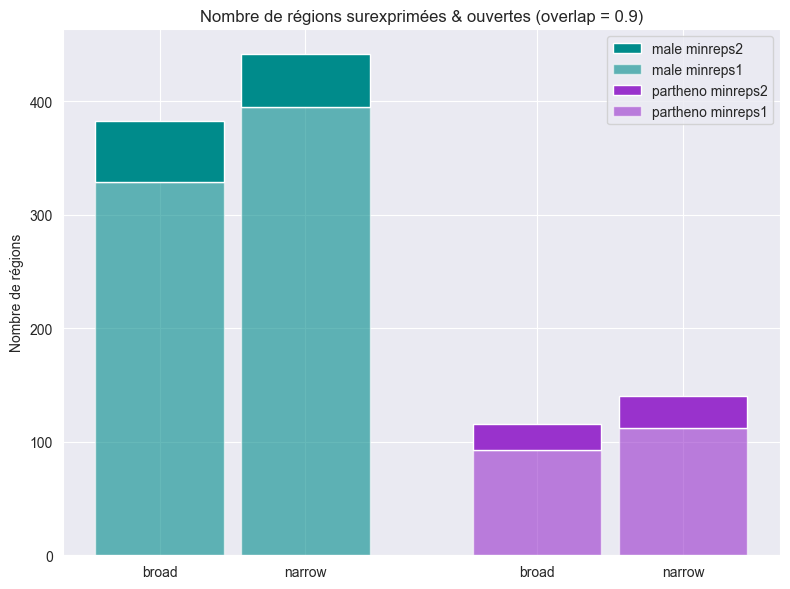

In [34]:
columns = ['gender', 'peak_type', 'min_reps', 'scaffold_1', 'scaffold_2', 'scaffold_3', 'scaffold_4']
df = pd.DataFrame(DAR_DEG_peak_data, columns=columns)

df['count'] = df['scaffold_1'] + df['scaffold_2'] + df['scaffold_3'] + df['scaffold_4']
df.drop(columns=['scaffold_1', 'scaffold_2', 'scaffold_3', 'scaffold_4'], inplace=True)

pivot_df = df.pivot_table(index=['gender', 'peak_type'], columns='min_reps', values='count').reset_index()

# Plotting
fig, ax = plt.subplots(figsize=(8, 6))

colors = {
    'male': 'darkcyan',
    'partheno': 'darkorchid'
}
width = 0.15
gap = 0.02
group_gap = 0.1

# Getting evenly spaced positions, starting from 0
positions = [0]
for i in range(len(pivot_df) - 1):
    if i % 2 == 0:
        pos = positions[-1] + width + gap
    else:
        pos = positions[-1] + width + gap + group_gap
    positions.append(pos)

for i, (index, row) in enumerate(pivot_df.iterrows()):
    pos = positions[i]
    ax.bar(pos, row['minreps1'], width, color=colors[row['gender']], alpha=0.6, label=row['gender'] + ' minreps1' if i % 2 else '')
    ax.bar(pos, row['minreps2'], width, bottom=row['minreps1'], color=colors[row['gender']], label=row['gender'] + ' minreps2' if i == 0 or i == 2 else '')

ax.set_ylabel('Nombre de régions')
ax.set_title('Nombre de régions surexprimées & ouvertes (overlap = 0.9)')
ax.set_xticks(positions)
ax.set_xticklabels([f'{row["peak_type"]}' for index, row in pivot_df.iterrows()])
ax.legend(loc='upper right')
plt.tight_layout()
plt.savefig(plot_directory + 'integrated_count_comparison_overlap0.9.png')
plt.show()
plt.close()

## Visualization: DEG average distance from TSS (example with Male_REP1, minreps = 1)
Check if open peaks in all male DEGs are at a certain distance from the TSS: table for cross-checking. Useful to see if we have to change the initial arbitrary -/+ 1500pb around the TSS we did on the RNA bed file.

In [35]:
annotate_peaks_broad_path = FAIRE_directory + 'broad/bwa/merged_library/macs2/broad_peak/Male_REP1.mLb.clN_peaks.annotatePeaks.txt'
annotate_peaks_broad = pd.read_csv(annotate_peaks_broad_path, sep='\t')
DAR_broad_DEG_male_path = integrated_directory + '/DAR_broad_DEG_male_minreps1_overlap0.9.bed'
DAR_broad_DEG_male = pd.read_csv(DAR_broad_DEG_male_path, sep='\t', names=header_DAR_broad_DEG)
annotate_peaks_broad

,PeakID (cmd=annotatePeaks.pl Male_REP1.mLb.clN_peaks.broadPeak Acyrthosiphon_pisum_JIC1_v1.0.scaffolds.fa -gid -gtf Acyrthosiphon_pisum_JIC1_v1.0.scaffolds.braker2.exon.gtf -cpu 6),Chr,Start,End,Strand,Peak Score,Focus Ratio/Region Size,Annotation,Detailed Annotation,Distance to TSS,Nearest PromoterID,Entrez ID,Nearest Unigene,Nearest Refseq,Nearest Ensembl,Gene Name,Gene Alias,Gene Description,Gene Type
0,Male_REP1.mLb.clN_peak_1878,scaffold_1,166998222,166998620,+,945,NaN,TTS (g11151),protein_coding-TTS (g11151),6677.0,g11151,g11151,g11151.t1,NaN,NaN,NaN,NaN,NaN,protein_coding
1,Male_REP1.mLb.clN_peak_1887,scaffold_1,167234820,167236932,+,796,NaN,"intron (g11177, intron 1 of 4)","protein_coding-intron (g11177, intron 1 of 4)",1220.0,g11177,g11177,g11177.t1,NaN,NaN,NaN,NaN,NaN,protein_coding
2,Male_REP1.mLb.clN_peak_2019,scaffold_19,63197,66537,+,578,NaN,TTS (g107),protein_coding-TTS (g107),661.0,g106,g106,g106.t1,NaN,NaN,NaN,NaN,NaN,protein_coding
3,Male_REP1.mLb.clN_peak_1889,scaffold_1,167244557,167245840,+,406,NaN,TTS (g11178),protein_coding-TTS (g11178),272.0,g11179,g11179,g11179.t1,NaN,NaN,NaN,NaN,NaN,protein_coding
4,Male_REP1.mLb.clN_peak_8688,scaffold_3,21843,22580,+,388,NaN,TTS (g13033),protein_coding-TTS (g13033),465.0,g13032,g13032,g13032.t1,NaN,NaN,NaN,NaN,NaN,protein_coding
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15389,Male_REP1.mLb.clN_peak_12225,scaffold_3,96988219,96988469,+,10,NaN,Intergenic,Intergenic,95742.0,g18465,g18465,g18465.t1,NaN,NaN,NaN,NaN,NaN,protein_coding
15390,Male_REP1.mLb.clN_peak_3249,scaffold_2,34207246,34207869,+,10,NaN,"intron (g24597, intron 4 of 17)","protein_coding-intron (g24597, intron 4 of 25)",-13070.0,g24597,g24597,g24597.t5,NaN,NaN,NaN,NaN,NaN,protein_coding
15391,Male_REP1.mLb.clN_peak_9575,scaffold_3,23743000,23743280,+,10,NaN,"exon (g14380, exon 1 of 8)","protein_coding-exon (g14380, exon 1 of 8)",194.0,g14380,g14380,g14380.t1,NaN,NaN,NaN,NaN,NaN,protein_coding
15392,Male_REP1.mLb.clN_peak_3834,scaffold_2,47242850,47243035,+,10,NaN,Intergenic,Intergenic,-9563.0,g25264,g25264,g25264.t1,NaN,NaN,NaN,NaN,NaN,protein_coding


In [36]:
annotate_peaks_narrow_path = FAIRE_directory + '/narrow/bwa/merged_library/macs2/narrow_peak/Male_REP1.mLb.clN_peaks.annotatePeaks.txt'
annotate_peaks_narrow = pd.read_csv(annotate_peaks_narrow_path, sep='\t')
DAR_narrow_DEG_male_path = integrated_directory + '/DAR_narrow_DEG_male_minreps1_overlap0.9.bed'
DAR_narrow_DEG_male = pd.read_csv(DAR_narrow_DEG_male_path, sep='\t', names=header_DAR_narrow_DEG)
annotate_peaks_narrow

,PeakID (cmd=annotatePeaks.pl Male_REP1.mLb.clN_peaks.narrowPeak Acyrthosiphon_pisum_JIC1_v1.0.scaffolds.fa -gid -gtf Acyrthosiphon_pisum_JIC1_v1.0.scaffolds.braker2.exon.gtf -cpu 6),Chr,Start,End,Strand,Peak Score,Focus Ratio/Region Size,Annotation,Detailed Annotation,Distance to TSS,Nearest PromoterID,Entrez ID,Nearest Unigene,Nearest Refseq,Nearest Ensembl,Gene Name,Gene Alias,Gene Description,Gene Type
0,Male_REP1.mLb.clN_peak_1251,scaffold_1,167235469,167235717,+,3662,NaN,"intron (g11177, intron 1 of 4)","protein_coding-intron (g11177, intron 1 of 4)",937.0,g11177,g11177,g11177.t1,NaN,NaN,NaN,NaN,NaN,protein_coding
1,Male_REP1.mLb.clN_peak_1241,scaffold_1,166998223,166998620,+,1708,NaN,TTS (g11151),protein_coding-TTS (g11151),6677.0,g11151,g11151,g11151.t1,NaN,NaN,NaN,NaN,NaN,protein_coding
2,Male_REP1.mLb.clN_peak_1357,scaffold_19,63198,63954,+,1575,NaN,promoter-TSS (g105),protein_coding-promoter-TSS (g105),-100.0,g105,g105,g105.t1,NaN,NaN,NaN,NaN,NaN,protein_coding
3,Male_REP1.mLb.clN_peak_1359,scaffold_19,65702,66533,+,1496,NaN,TTS (g106),protein_coding-TTS (g106),1539.0,g107,g107,g107.t1,NaN,NaN,NaN,NaN,NaN,protein_coding
4,Male_REP1.mLb.clN_peak_1253,scaffold_1,167244558,167245839,+,1455,NaN,TTS (g11178),protein_coding-TTS (g11178),272.0,g11179,g11179,g11179.t1,NaN,NaN,NaN,NaN,NaN,protein_coding
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10889,Male_REP1.mLb.clN_peak_3886,scaffold_2,88575172,88575442,+,13,NaN,Intergenic,Intergenic,-11819.0,g27314,g27314,g27314.t1,NaN,NaN,NaN,NaN,NaN,protein_coding
10890,Male_REP1.mLb.clN_peak_2738,scaffold_2,50371875,50372291,+,13,NaN,Intergenic,Intergenic,-38187.0,g25382,g25382,g25382.t1,NaN,NaN,NaN,NaN,NaN,protein_coding
10891,Male_REP1.mLb.clN_peak_3665,scaffold_2,82533579,82533764,+,13,NaN,"exon (g26987, exon 13 of 17)","protein_coding-exon (g26987, exon 13 of 17)",3985.0,g26987,g26987,g26987.t1,NaN,NaN,NaN,NaN,NaN,protein_coding
10892,Male_REP1.mLb.clN_peak_456,scaffold_1,76058415,76058636,+,13,NaN,"intron (g4518, intron 1 of 4)","protein_coding-intron (g4518, intron 1 of 4)",20935.0,g4518,g4518,g4518.t1,NaN,NaN,NaN,NaN,NaN,protein_coding


In [37]:
annotate_peaks_broad_DEG_DAR = annotate_peaks_broad[(annotate_peaks_broad['Entrez ID'].isin(DAR_broad_DEG_male['gene']))]
annotate_peaks_broad_DEG_DAR

,PeakID (cmd=annotatePeaks.pl Male_REP1.mLb.clN_peaks.broadPeak Acyrthosiphon_pisum_JIC1_v1.0.scaffolds.fa -gid -gtf Acyrthosiphon_pisum_JIC1_v1.0.scaffolds.braker2.exon.gtf -cpu 6),Chr,Start,End,Strand,Peak Score,Focus Ratio/Region Size,Annotation,Detailed Annotation,Distance to TSS,Nearest PromoterID,Entrez ID,Nearest Unigene,Nearest Refseq,Nearest Ensembl,Gene Name,Gene Alias,Gene Description,Gene Type
79,Male_REP1.mLb.clN_peak_8966,scaffold_3,8264009,8264341,+,62,NaN,"intron (g13487, intron 2 of 5)","protein_coding-intron (g13487, intron 2 of 5)",10119.0,g13487,g13487,g13487.t1,NaN,NaN,NaN,NaN,NaN,protein_coding
232,Male_REP1.mLb.clN_peak_7686,scaffold_2,138014823,138015606,+,51,NaN,"intron (g29728, intron 2 of 4)","protein_coding-intron (g29728, intron 2 of 4)",10549.0,g29728,g29728,g29728.t1,NaN,NaN,NaN,NaN,NaN,protein_coding
507,Male_REP1.mLb.clN_peak_13789,scaffold_4,5411453,5412504,+,43,NaN,"intron (g20615, intron 2 of 6)","protein_coding-intron (g20615, intron 2 of 6)",27858.0,g20616,g20616,g20616.t1,NaN,NaN,NaN,NaN,NaN,protein_coding
661,Male_REP1.mLb.clN_peak_9991,scaffold_3,41834922,41835152,+,40,NaN,"exon (g15646, exon 1 of 1)","protein_coding-exon (g15646, exon 1 of 1)",389.0,g15646,g15646,g15646.t1,NaN,NaN,NaN,NaN,NaN,protein_coding
694,Male_REP1.mLb.clN_peak_6741,scaffold_2,116747180,116747399,+,40,NaN,"exon (g28681, exon 2 of 3)","protein_coding-exon (g28681, exon 2 of 3)",650.0,g28681,g28681,g28681.t2,NaN,NaN,NaN,NaN,NaN,protein_coding
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15266,Male_REP1.mLb.clN_peak_14253,scaffold_4,17205450,17205646,+,10,NaN,promoter-TSS (g21267),protein_coding-promoter-TSS (g21267),-150.0,g21267,g21267,g21267.t1,NaN,NaN,NaN,NaN,NaN,protein_coding
15312,Male_REP1.mLb.clN_peak_9262,scaffold_3,13895845,13896389,+,10,NaN,"exon (g13753, exon 4 of 4)","protein_coding-exon (g13753, exon 4 of 4)",8751.0,g13753,g13753,g13753.t1,NaN,NaN,NaN,NaN,NaN,protein_coding
15320,Male_REP1.mLb.clN_peak_15115,scaffold_4,36807986,36808517,+,10,NaN,Intergenic,Intergenic,-1492.0,g22299,g22299,g22299.t1,NaN,NaN,NaN,NaN,NaN,protein_coding
15360,Male_REP1.mLb.clN_peak_9593,scaffold_3,25122338,25122586,+,10,NaN,promoter-TSS (g14499),protein_coding-promoter-TSS (g14499),16.0,g14499,g14499,g14499.t1,NaN,NaN,NaN,NaN,NaN,protein_coding


In [38]:
annotate_peaks_narrow_DEG_DAR = annotate_peaks_narrow[(annotate_peaks_narrow['Entrez ID'].isin(DAR_narrow_DEG_male.gene))]
annotate_peaks_narrow_DEG_DAR

,PeakID (cmd=annotatePeaks.pl Male_REP1.mLb.clN_peaks.narrowPeak Acyrthosiphon_pisum_JIC1_v1.0.scaffolds.fa -gid -gtf Acyrthosiphon_pisum_JIC1_v1.0.scaffolds.braker2.exon.gtf -cpu 6),Chr,Start,End,Strand,Peak Score,Focus Ratio/Region Size,Annotation,Detailed Annotation,Distance to TSS,Nearest PromoterID,Entrez ID,Nearest Unigene,Nearest Refseq,Nearest Ensembl,Gene Name,Gene Alias,Gene Description,Gene Type
77,Male_REP1.mLb.clN_peak_5348,scaffold_2,138015283,138015605,+,149,NaN,"intron (g29728, intron 2 of 4)","protein_coding-intron (g29728, intron 2 of 4)",10319.0,g29728,g29728,g29728.t1,NaN,NaN,NaN,NaN,NaN,protein_coding
123,Male_REP1.mLb.clN_peak_1902,scaffold_2,21717447,21717702,+,130,NaN,"intron (g23934, intron 2 of 2)","protein_coding-intron (g23934, intron 2 of 2)",-1610.0,g23935,g23935,g23935.t1,NaN,NaN,NaN,NaN,NaN,protein_coding
261,Male_REP1.mLb.clN_peak_5347,scaffold_2,138011511,138011960,+,107,NaN,"intron (g29728, intron 2 of 4)","protein_coding-intron (g29728, intron 2 of 4)",14028.0,g29728,g29728,g29728.t1,NaN,NaN,NaN,NaN,NaN,protein_coding
551,Male_REP1.mLb.clN_peak_4312,scaffold_2,103103858,103104074,+,88,NaN,promoter-TSS (g28013),protein_coding-promoter-TSS (g28013),-39.0,g28013,g28013,g28013.t1,NaN,NaN,NaN,NaN,NaN,protein_coding
560,Male_REP1.mLb.clN_peak_10744,scaffold_4,38759204,38759840,+,88,NaN,Intergenic,Intergenic,-24416.0,g22400,g22400,g22400.t1,NaN,NaN,NaN,NaN,NaN,protein_coding
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10618,Male_REP1.mLb.clN_peak_1117,scaffold_1,147239139,147239397,+,15,NaN,promoter-TSS (g9631),protein_coding-promoter-TSS (g9631),-398.0,g9631,g9631,g9631.t1,NaN,NaN,NaN,NaN,NaN,protein_coding
10711,Male_REP1.mLb.clN_peak_10028,scaffold_4,17306001,17306365,+,14,NaN,promoter-TSS (g21270),protein_coding-promoter-TSS (g21270),-165.0,g21270,g21270,g21270.t3,NaN,NaN,NaN,NaN,NaN,protein_coding
10793,Male_REP1.mLb.clN_peak_5091,scaffold_2,130569621,130569810,+,14,NaN,"exon (g29376, exon 7 of 8)","protein_coding-exon (g29376, exon 7 of 8)",5989.0,g29376,g29376,g29376.t1,NaN,NaN,NaN,NaN,NaN,protein_coding
10832,Male_REP1.mLb.clN_peak_2160,scaffold_2,32569696,32569997,+,13,NaN,promoter-TSS (g24474),protein_coding-promoter-TSS (g24474),-70.0,g24474,g24474,g24474.t1,NaN,NaN,NaN,NaN,NaN,protein_coding


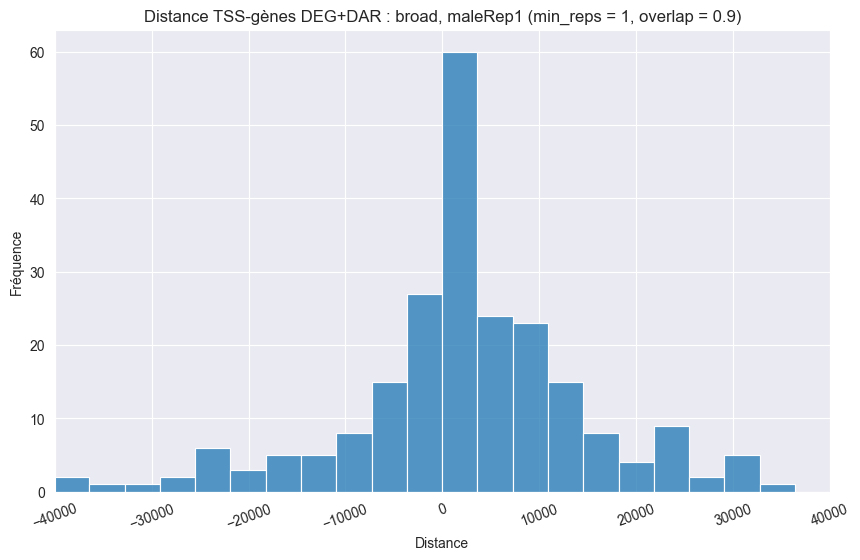

In [39]:
plt.figure(figsize=(10, 6))
sns.histplot(data=annotate_peaks_broad_DEG_DAR, x='Distance to TSS')
plt.title(f'Distance TSS-gènes DEG+DAR : broad, maleRep1 (min_reps = 1, overlap = 0.9)')
plt.ylabel('Fréquence')
plt.xlabel('Distance')
plt.xticks(rotation=20)
plt.xlim(-40000,40000)
plt.savefig(plot_directory + 'annotate_peaks_DEG_DAR_broad_minreps1_overlap0.9.png')
plt.show()
plt.close()

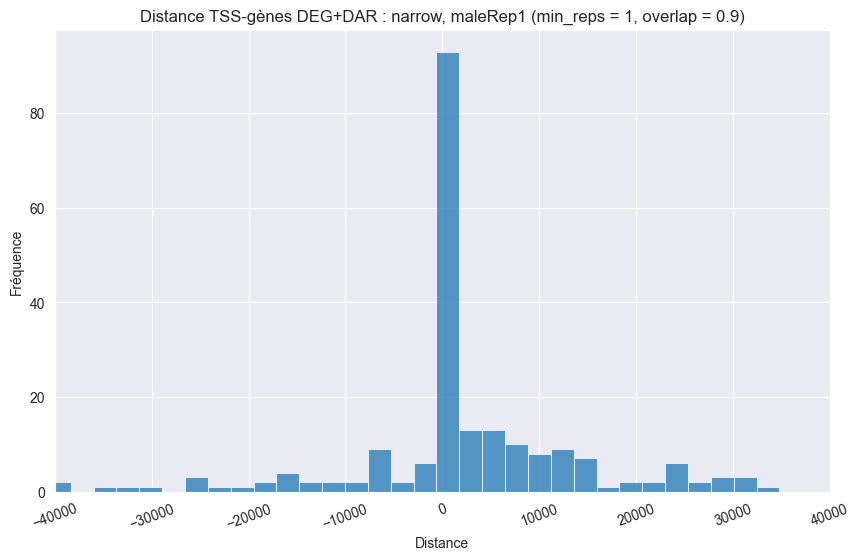

In [40]:
plt.figure(figsize=(10, 6))
sns.histplot(data=annotate_peaks_narrow_DEG_DAR, x='Distance to TSS')
plt.title(f'Distance TSS-gènes DEG+DAR : narrow, maleRep1 (min_reps = 1, overlap = 0.9)')
plt.ylabel('Fréquence')
plt.xlabel('Distance')
plt.xticks(rotation=20)
plt.xlim(-40000,40000)
plt.savefig(plot_directory + 'annotate_peaks_DEG_DAR_narrow_minreps1_overlap0.9.png')
plt.show()
plt.close()